In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns
import networkx as nx
import ast
import scipy
from pyvis.network import Network
from matplotlib import animation
import community as community_louvain
from scipy import stats
import time
from tqdm.auto import tqdm

# PREPARO DOS DADOS

In [3]:
df = pd.read_excel('dados_brutos.xlsx')

In [4]:
orgs = df['organization_id']
users = df['user']
org_u = set(orgs)
dic_userPorOrg = {}
for i,org in enumerate(org_u):
    df_aux = df.loc[(df["organization_id"] == org),:]
    user_aux = df_aux["user"]
    dic_userPorOrg[org] = len(set(user_aux))


In [5]:
organizations = []
n_users = []
for k,v in dic_userPorOrg.items():
    organizations.append(k)
    n_users.append(v)

df_userPorOrg = pd.DataFrame({
    'organization_id': organizations,
    'N_users': n_users
})

df_userPorOrg = df_userPorOrg.sort_values(ascending=False, by='N_users').reset_index(drop=True)

In [6]:
dic_pathPorOrg = {}
paths_list_t = []
orgs = df_userPorOrg["organization_id"]

for org in orgs:
    path_aux = df.loc[(df["organization_id"] == org),(["path_actions"])]
    paths_list_u = []
    lista = [ast.literal_eval(paths[0]) for paths in path_aux.values]
    paths_list_u.extend((set(lista[0]))) #extend adiciona cada elemento da lista em paths_list
    paths_list_t.extend((lista[0])) #extend adiciona cada elemento da lista em paths_list_u
    dic_pathPorOrg[org] = (set(paths_list_u))

df_paths = pd.DataFrame()
df_paths['Count'] = pd.Series(paths_list_t).value_counts().values
df_paths['Actions'] = pd.Series(paths_list_t).value_counts().keys()

In [7]:
action_d = {}
novo_path_list = [0]*len(paths_list_t)
cont = 0
for i,path in enumerate(paths_list_t):
    if path not in action_d.keys():
        action_d[path] = cont
        cont += 1

for i,path in enumerate(paths_list_t):
    novo_path_list[i] = action_d[path]

# ANÁLISE EXPLORATÓRIA

In [8]:
mean = np.mean(novo_path_list)
median = np.median(novo_path_list)
mode = stats.mode(novo_path_list)
dp = np.std(novo_path_list)
print(f'Mean: {mean}, median: {median}, mode: {mode}, dp: {dp}')

Mean: 5.162921348314606, median: 3.0, mode: ModeResult(mode=array([3]), count=array([643])), dp: 6.82367508799287


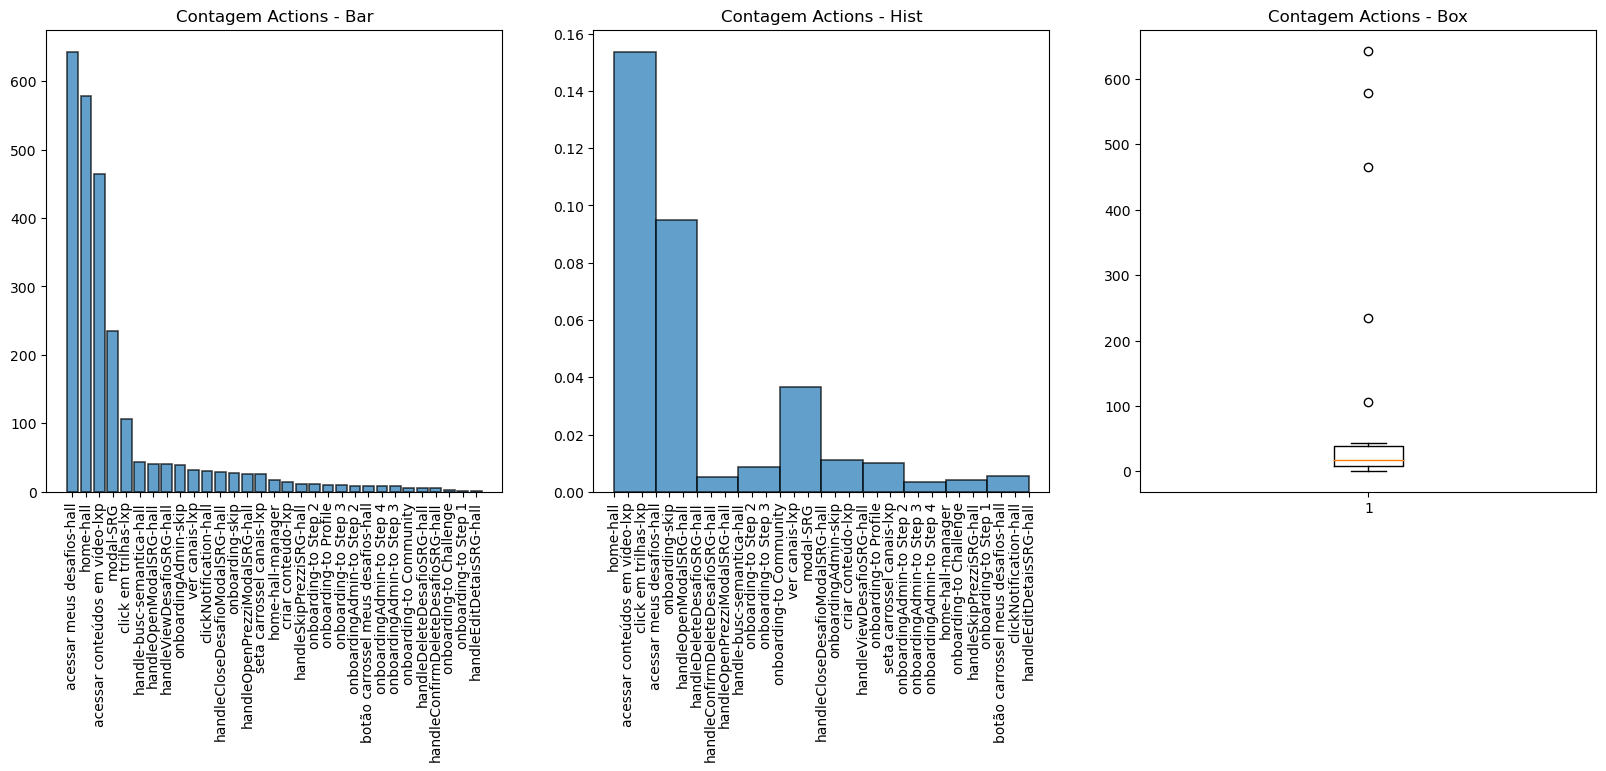

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(df_paths['Actions'], df_paths['Count'], edgecolor='black', linewidth=1.2, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Bar')

plt.subplot(1,3,2)
plt.hist(paths_list_t, edgecolor='black', linewidth=1.2, alpha=0.7, density=True)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Hist')

plt.subplot(1,3,3)
plt.boxplot(df_paths['Count'])
plt.title('Contagem Actions - Box')
plt.show()

In [10]:
organizations2 = []
paths = []
for k,v in dic_pathPorOrg.items():
    organizations2.append(k)
    paths.append(v)

df_pathPorOrg = pd.DataFrame({
    'organization_id': organizations2,
    'Paths': paths
})

In [11]:
df_pathPorOrg.head(20)

,organization_id,Paths
0,4f3e63d2-43f8-4886-addc-9ce039eab5f1,"{acessar conteúdos em vídeo-lxp, home-hall, cl..."
1,4adb5f9b-f50a-4957-a7e3-94c3452d877c,"{acessar meus desafios-hall, acessar conteúdos..."
2,c81fa8b0-52c0-4a31-abb7-6776a76cc9c8,"{acessar meus desafios-hall, acessar conteúdos..."
3,d3400673-a5b2-4914-bf57-ce98dc710603,"{acessar meus desafios-hall, handleOpenPrezziM..."
4,9e3e7a95-c6f5-4b6f-b189-8f33e45ee425,"{acessar meus desafios-hall, home-hall, handle..."
5,347ceb13-8656-4ed0-b080-c6cfb5528b25,{home-hall}
6,abba8235-15bd-4285-90b4-104e9308013e,"{click em trilhas-lxp, onboarding-to Step 3, o..."
7,50ca2381-2d91-4d7e-8300-bb625d5cb97f,"{acessar meus desafios-hall, acessar conteúdos..."
8,6019ee26-09c3-422e-8c25-0abe878d1a73,"{acessar conteúdos em vídeo-lxp, ver canais-lx..."
9,c8c88852-b101-4b47-aaca-4cee45368c9f,"{acessar meus desafios-hall, handleCloseDesafi..."


In [14]:
testando = df['path_actions']
actions = pd.DataFrame({ 'from':[], 'to':[], 'value':[]})
from_ = list(actions['from'])
to_ = list(actions['to'])
value_ = []
counts = {}
saidas_totais = {}

for lista in testando:
    lista_x = ast.literal_eval(lista)
    len_lista = len(lista_x)
    for i,e in enumerate(ast.literal_eval(lista)):
        if i + 1 < len_lista:
            # print(e)
            # print(ast.literal_eval(lista)[i+1])
            # print('---')
            e_1 = ast.literal_eval(lista)[i+1]

            from_.append(e)
            to_.append(e_1)

            if (e,e_1) not in counts.keys():
                counts[(e,e_1)] = 1
            else:
                counts[(e,e_1)] += 1

            if e not in saidas_totais.keys():
                saidas_totais[e] = 1
            else:
                saidas_totais[e] += 1
actions['from'] = from_
actions['to'] = to_


for lista in testando:
    lista_x = ast.literal_eval(lista)
    len_lista = len(lista_x)
    for i,e in enumerate(ast.literal_eval(lista)):
        if i + 1 < len_lista:
            # print(e)
            # print(ast.literal_eval(lista)[i+1])
            # print('---')
            e_1 = ast.literal_eval(lista)[i+1]
            value_.append(counts[(e, e_1)])
actions['value'] = value_


In [15]:
min_value = actions['value'].min()
max_value = actions['value'].max()

actions['normalized_value'] = ((actions['value'] - min_value) / (max_value - min_value)) * 99 + 1
actions['normalized_value'] = actions['normalized_value'].round(0).astype(int)

In [16]:
actions

,from,to,value,normalized_value
0,home-hall,acessar meus desafios-hall,1415,31
1,acessar meus desafios-hall,handleViewDesafioSRG-hall,533,12
2,handleViewDesafioSRG-hall,home-hall,157,4
3,home-hall,acessar conteúdos em vídeo-lxp,1441,31
4,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,1639,36
...,...,...,...,...
33714,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,1639,36
33715,click em trilhas-lxp,home-hall,330,8
33716,home-hall,acessar conteúdos em vídeo-lxp,1441,31
33717,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,1639,36


In [17]:
G = nx.from_pandas_edgelist(actions[0:500],
                            source="from",
                            target="to",
                            edge_attr="normalized_value", #tamanhos distintos do edge
                            create_using= nx.Graph())

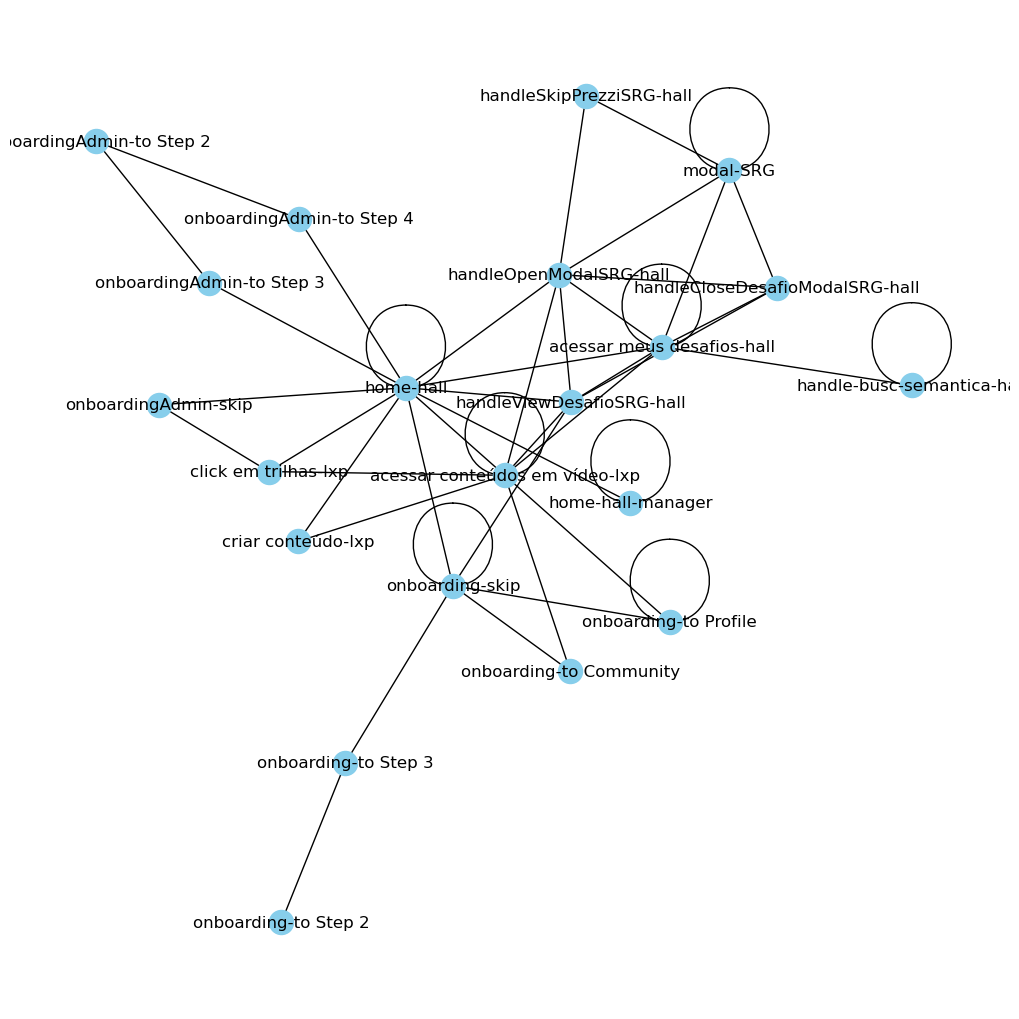

In [18]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, node_color='skyblue', edge_cmap=plt.cm.Blues, arrows=True)
plt.show()

In [19]:
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree) #n de conexões que ele fez, tamanho e cor estão relacionados

nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
# net.show("Markov.html")

### Medidas de centralidade -> Basicamente são maneiras de avaliar a importância de nodes em uma rede, usarei a 'degree centrality' que mede o grau de importância de um node de acordo com o numero de conexões que ele faz

<AxesSubplot:>

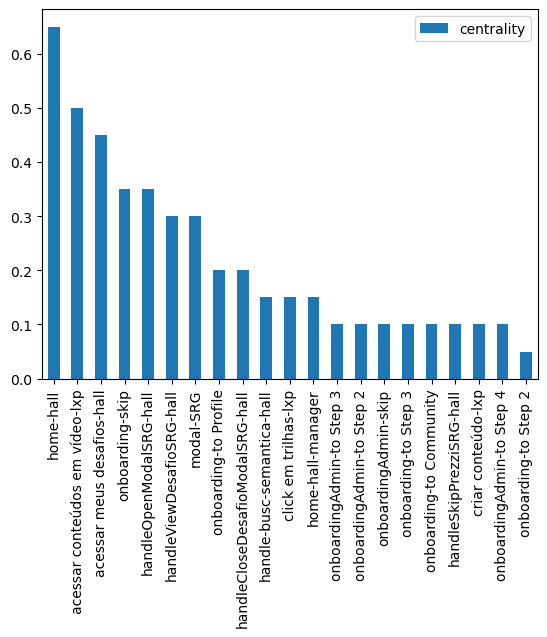

In [20]:
degree_dict = nx.degree_centrality(G)

degree_df = pd.DataFrame.from_dict(degree_dict, orient='index',columns=['centrality'])

degree_df.sort_values('centrality', ascending=False).plot(kind='bar')

In [21]:
com_net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')
com_net.from_nx(G)

# Normalize degree centrality values for color mapping
min_degree = min(degree_dict.values())
max_degree = max(degree_dict.values())
norm = cm.colors.Normalize(vmin=min_degree, vmax=max_degree)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)

i = 0
# Set node colors based on degree centrality
for node, degree in degree_dict.items():
    color = cm.colors.rgb2hex(mapper.to_rgba(degree))
    com_net.nodes[i]['color'] = color
    com_net.nodes[i]['font']['color'] = color
    i += 1

com_net.show("Markov_communities.html")

Markov_communities.html


MovieWriter imagemagick unavailable; using Pillow instead.


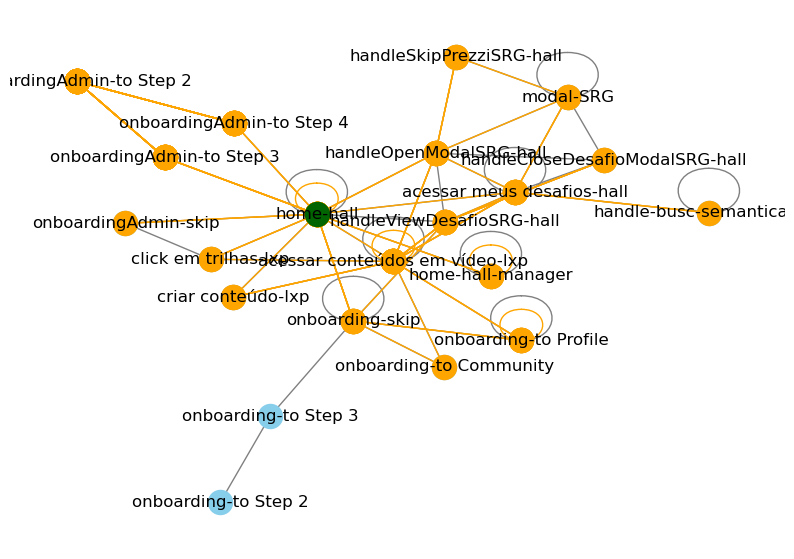

In [22]:
# Random Walk parameters
num_steps = 100
start_node = np.random.choice(G.nodes())

# Random walk logic
def random_walk(G, start_node, num_steps):
    walk = [start_node]
    current_node = start_node
    for _ in range(num_steps):
        neighbors = list(G.neighbors(current_node))
        if not neighbors:
            break
        next_node = np.random.choice(neighbors)
        walk.append(next_node)
        current_node = next_node
    return walk

walk = random_walk(G, start_node, num_steps)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Position nodes using spring layout
pos = nx.kamada_kawai_layout(G)

# Draw the network with initial settings
nx.draw(G, pos, ax=ax, node_color='skyblue', edge_color='gray', with_labels=True)

# Function to update the frame for each step
def update(num):
    ax.clear()
    nx.draw(G, pos, ax=ax, node_color='skyblue', edge_color='gray', with_labels=True)
    
    # Highlight the nodes and edges involved in the random walk up to the current step
    path_nodes = walk[:num+1]
    path_edges = [(walk[i], walk[i+1]) for i in range(num)]
    
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='orange', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', ax=ax)

    # Highlight the current node
    nx.draw_networkx_nodes(G, pos, nodelist=[walk[num]], node_color='darkgreen', ax=ax)

ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=700, repeat=False)

# Save animation as a GIF
ani.save('random_walk.gif', writer='imagemagick')

plt.show()

# CRIANDO MATRIX DE TRANSIÇÃO

In [25]:
total = sum(counts.values())
counts_freq = counts
for k,v in counts_freq.items():
    counts_freq[k] = v/saidas_totais[k[0]]

In [26]:
matrix = pd.DataFrame()
for k in action_d.keys():
    matrix[k] = 0
    matrix.loc[k] = 0

for k,v in counts_freq.items():
    matrix.loc[k[0], k[1]] = v


In [27]:
print(matrix.loc['home-hall', 'onboarding-skip']) #linha, coluna

0.0046048537647790915


In [28]:
matrix = matrix.fillna(0)
matrix

,home-hall,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,acessar meus desafios-hall,onboarding-skip,handleOpenModalSRG-hall,handleDeleteDesafioSRG-hall,handleConfirmDeleteDesafioSRG-hall,handleOpenPrezziModalSRG-hall,handle-busc-semantica-hall,...,onboardingAdmin-to Step 4,home-hall-manager,onboarding-to Challenge,handleSkipPrezziSRG-hall,onboarding-to Step 1,botão carrossel meus desafios-hall,clickNotification-hall,handleEditDetaisSRG-hall,click em módulos-lxp,handleCancelDeleteDesafioSRG-hall
home-hall,0.582078,0.179340,0.000000,0.176105,0.004605,0.007716,0.000000,0.000000,0.002614,0.008339,...,0.000124,0.007841,0.000000,0.000000,0.000000,0.000000,0.014935,0.000124,0.000000,0.000000
acessar conteúdos em vídeo-lxp,0.055984,0.559124,0.294097,0.024762,0.001435,0.000179,0.000000,0.000000,0.000000,0.002512,...,0.000000,0.001794,0.000000,0.000000,0.000000,0.000000,0.001077,0.000000,0.007716,0.000000
click em trilhas-lxp,0.319149,0.567698,0.010638,0.063830,0.010638,0.000967,0.000000,0.000000,0.000000,0.002901,...,0.000000,0.000967,0.000000,0.000000,0.000000,0.000000,0.008704,0.000000,0.000000,0.000000
acessar meus desafios-hall,0.074232,0.026924,0.000000,0.589747,0.002890,0.050198,0.007454,0.000000,0.039550,0.002586,...,0.000000,0.001065,0.000000,0.002434,0.000000,0.014147,0.001977,0.007301,0.000000,0.000000
onboarding-skip,0.124812,0.001504,0.000000,0.009023,0.533835,0.012030,0.000000,0.000000,0.010526,0.000000,...,0.000000,0.000000,0.037594,0.000000,0.012030,0.000000,0.000000,0.000000,0.000000,0.000000
handleOpenModalSRG-hall,0.015260,0.001795,0.000000,0.012567,0.000000,0.018851,0.001795,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.008079,0.000000,0.000000,0.000000,0.000898,0.000000,0.000000
handleDeleteDesafioSRG-hall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932584,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067416
handleConfirmDeleteDesafioSRG-hall,0.333333,0.111111,0.000000,0.125000,0.013889,0.055556,0.097222,0.000000,0.138889,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000
handleOpenPrezziModalSRG-hall,0.018617,0.000000,0.000000,0.021277,0.000000,0.515957,0.000000,0.000000,0.013298,0.000000,...,0.000000,0.000000,0.000000,0.414894,0.000000,0.005319,0.000000,0.002660,0.000000,0.000000
handle-busc-semantica-hall,0.141414,0.070707,0.003367,0.124579,0.003367,0.000000,0.000000,0.000000,0.000000,0.639731,...,0.000000,0.003367,0.000000,0.000000,0.000000,0.000000,0.006734,0.000000,0.000000,0.000000


In [29]:
teste = list(matrix.loc['home-hall', :])
sum(teste)

0.9999999999999999

# MONTE CARLO

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## TESTANDO

In [30]:
medias = []

for i in range(0,500):
    l_aux = random.choices(novo_path_list, k=2000)
    # l_aux = np.random.normal(loc=mean, scale=dp, size=20)
    medias.append(np.mean(l_aux))


mm = np.mean(medias)
upper = np.quantile(medias, 0.975)
lower = np.quantile(medias, 0.025)
print(mm, lower, upper)


5.167464 4.8936625000000005 5.493987499999999


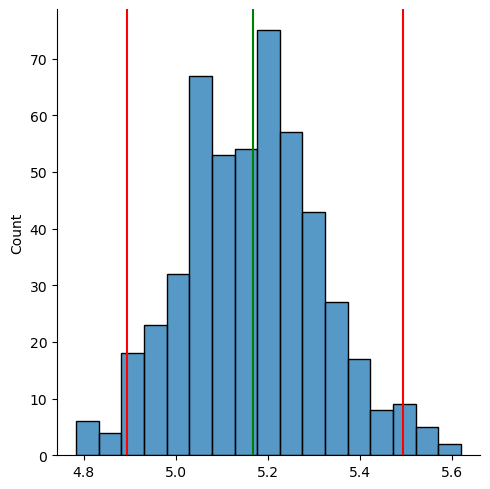

In [31]:
sns.displot(medias)

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
plt.axvline(mm, color='green')
plt.show()



## COMEÇO

In [32]:
originais = pd.read_excel('caminhos_originais.xlsx')
path_actions = df['path_actions']
contagem = {}
caminhos = originais['caminho']
repetidos = []
i = 0
for caminho in caminhos:
    for path in path_actions:
        if path == caminho:
            if originais['nome_caminho'][i] not in contagem.keys():
                contagem[originais['nome_caminho'][i]] = 1
            else:
                contagem[originais['nome_caminho'][i]] += 1
            repetidos.append(originais['nome_caminho'][i])
    i += 1
originais['contagem'] = contagem.values()

total = originais['contagem'].sum()
originais['contagem'] = originais['contagem']/total
pesos = originais['contagem']

In [33]:
originais

,Unnamed: 0,nome_caminho,caminho,contagem
0,0,caminho_0,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",0.049917
1,1,caminho_1,"['onboardingAdmin-skip', 'home-hall', 'acessar...",0.026622
2,2,caminho_4,"['home-hall', 'acessar meus desafios-hall', 'h...",0.039933
3,3,caminho_5,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",0.354409
4,4,caminho_6,"['home-hall', 'acessar conteúdos em vídeo-lxp']",0.038270
...,...,...,...,...
59,59,caminho_70,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",0.006656
60,60,caminho_71,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",0.008319
61,61,caminho_72,"['home-hall', 'home-hall', 'acessar meus desaf...",0.009983
62,62,caminho_73,"['home-hall', 'clickNotification-hall', 'home-...",0.006656


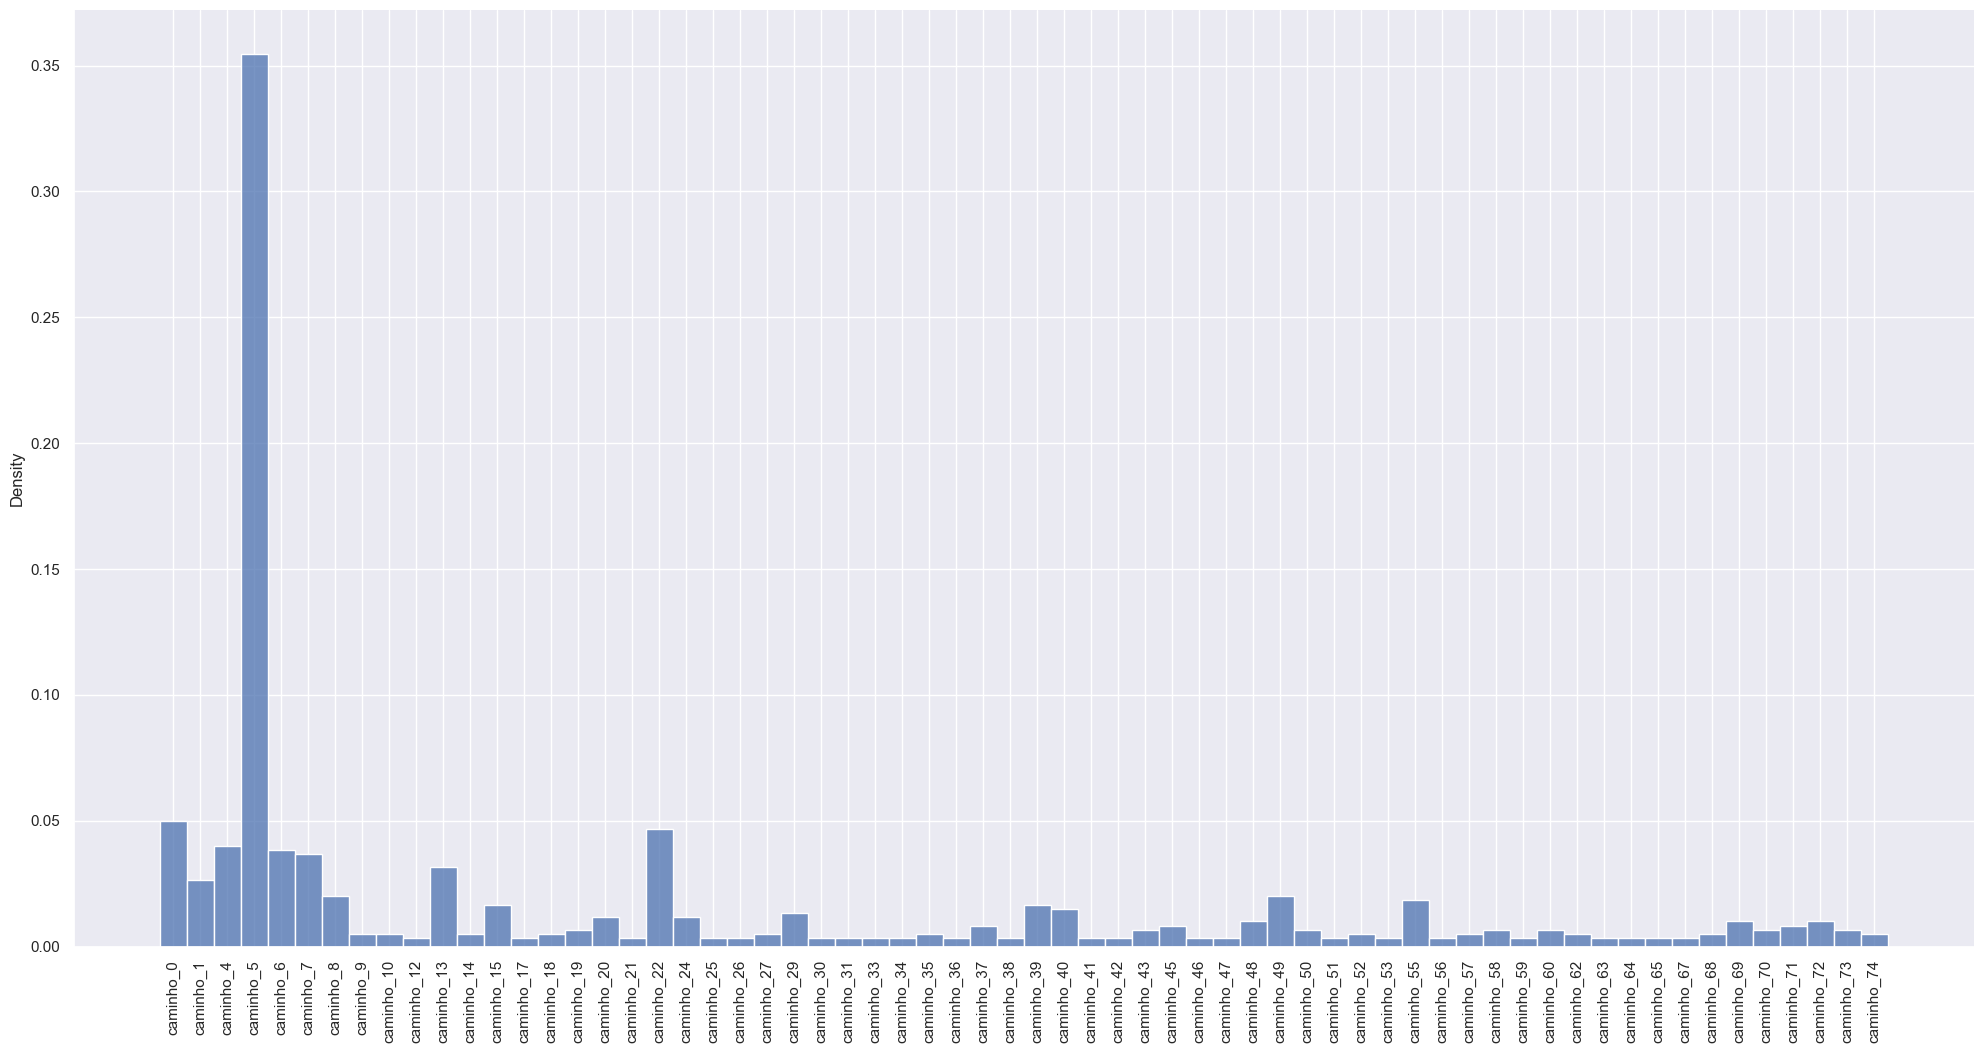

In [34]:
sns.set_theme(rc={
    
})
sns.displot(repetidos, height=10, aspect=2, kind='hist', stat='density')
plt.xticks(rotation=90)
plt.show()


In [36]:
matrix.columns

Index(['home-hall', 'acessar conteúdos em vídeo-lxp', 'click em trilhas-lxp',
       'acessar meus desafios-hall', 'onboarding-skip',
       'handleOpenModalSRG-hall', 'handleDeleteDesafioSRG-hall',
       'handleConfirmDeleteDesafioSRG-hall', 'handleOpenPrezziModalSRG-hall',
       'handle-busc-semantica-hall', 'onboarding-to Step 2',
       'onboarding-to Step 3', 'onboarding-to Community', 'ver canais-lxp',
       'modal-SRG', 'handleCloseDesafioModalSRG-hall', 'onboardingAdmin-skip',
       'criar conteúdo-lxp', 'handleViewDesafioSRG-hall',
       'onboarding-to Profile', 'seta carrossel canais-lxp',
       'onboardingAdmin-to Step 2', 'onboardingAdmin-to Step 3',
       'onboardingAdmin-to Step 4', 'home-hall-manager',
       'onboarding-to Challenge', 'handleSkipPrezziSRG-hall',
       'onboarding-to Step 1', 'botão carrossel meus desafios-hall',
       'clickNotification-hall', 'handleEditDetaisSRG-hall',
       'click em módulos-lxp', 'handleCancelDeleteDesafioSRG-hall'],
     

In [37]:
matrix_np = matrix.to_numpy()
Po = np.array([0]*33)
Po[0] = 1
home_hall_progresso = []
acessar_desafios_progresso = []
click_trilhas_progresso = []
acessar_conteudos_progresso = []
i = 0
for i in tqdm(range(1000000)):
    home_hall_progresso.append(Po[0])
    acessar_desafios_progresso.append(Po[3])
    click_trilhas_progresso.append(Po[2])
    acessar_conteudos_progresso.append(Po[1])

    Po = np.matmul(Po, matrix_np)

print(sum(Po))
print(Po)

100%|██████████| 1000000/1000000 [00:04<00:00, 232466.19it/s]

0.999999999999999
[1.76567057e-01 1.95666017e-01 5.88890427e-02 1.99321078e-01
 7.92065450e-03 3.46691944e-02 2.86176324e-03 2.66883538e-03
 1.12803814e-02 9.81427789e-03 1.83111370e-03 1.75317233e-03
 1.85035783e-03 6.21818899e-03 1.88599419e-01 2.69936481e-02
 2.66598817e-03 2.27125676e-03 2.70404849e-02 1.13559886e-03
 4.74772921e-03 7.88755205e-04 7.18188820e-04 6.64678373e-04
 2.76916836e-03 4.81400570e-04 5.49036135e-03 1.56997276e-04
 1.00573949e-02 9.75628465e-03 2.49920329e-03 1.65937931e-03
 1.92927859e-04]


In [38]:
df_progresso = pd.DataFrame({
    'Steps': np.arange(0,100,1),
    'Home Hall': home_hall_progresso[0:100],
    'Acessar conteudos': acessar_conteudos_progresso[0:100],
    'Clicar trilhas': click_trilhas_progresso[0:100],
    'Acessar desafios': acessar_desafios_progresso[0:100]
})

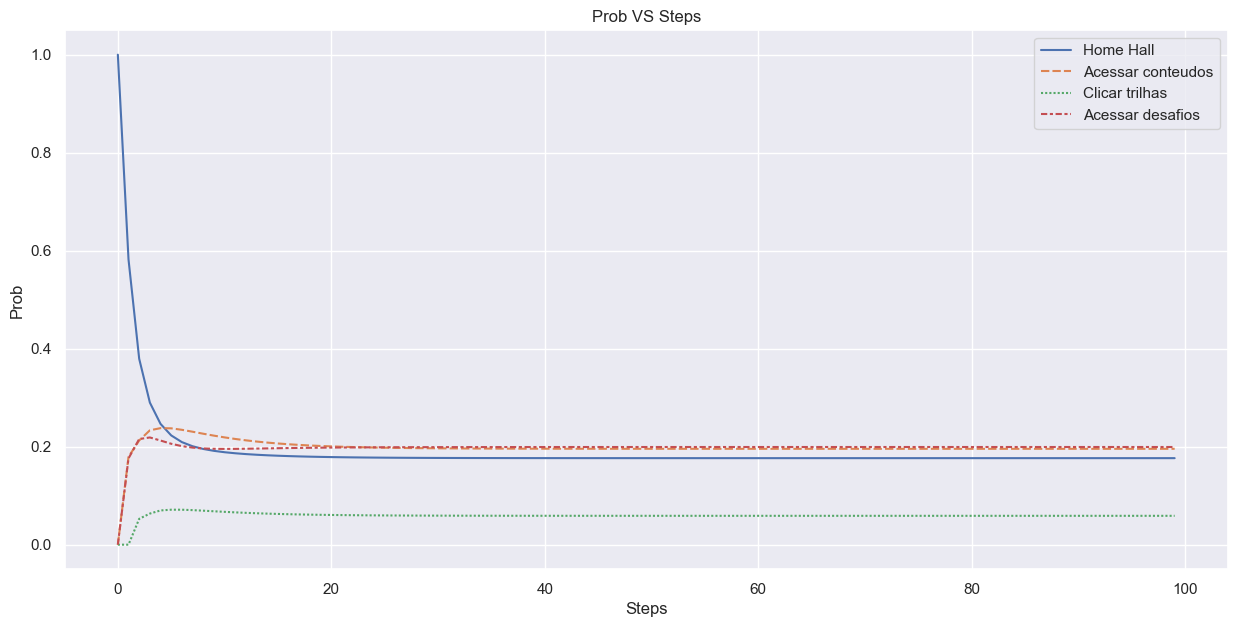

In [39]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_progresso[['Home Hall', 'Acessar conteudos', 'Clicar trilhas', 'Acessar desafios']])
plt.xlabel('Steps')
plt.ylabel('Prob')
plt.title('Prob VS Steps')
plt.show()

In [100]:
serie_nova = []
for i in range(0,90000):
    l_aux = random.choices(matrix.columns, weights=Po ,k=500)
    for e in l_aux:
        serie_nova.append(e)

In [101]:
df_novo = pd.DataFrame(serie_nova)

In [115]:
series = pd.Series(df_novo.value_counts())

In [131]:
dict_series = dict(series)

In [140]:
chaves = dict_series.keys()
chaves2 = []
for e in chaves:
    chaves2.append(e[0])

In [154]:
contagem = series.values
total = sum(contagem)

In [155]:
df_monte_carlo = pd.DataFrame()
df_monte_carlo['contagem'] = contagem/total
df_monte_carlo['chaves'] = chaves2

In [156]:
df_monte_carlo

,contagem,chaves
0,0.199288,acessar meus desafios-hall
1,0.195560,acessar conteúdos em vídeo-lxp
2,0.188667,modal-SRG
3,0.176575,home-hall
4,0.058950,click em trilhas-lxp
5,0.034679,handleOpenModalSRG-hall
6,0.027032,handleViewDesafioSRG-hall
7,0.026962,handleCloseDesafioModalSRG-hall
8,0.011291,handleOpenPrezziModalSRG-hall
9,0.010045,botão carrossel meus desafios-hall


In [162]:
total_path = sum(df_paths['Count'])
df_paths['Count'] = df_paths['Count']/total_path

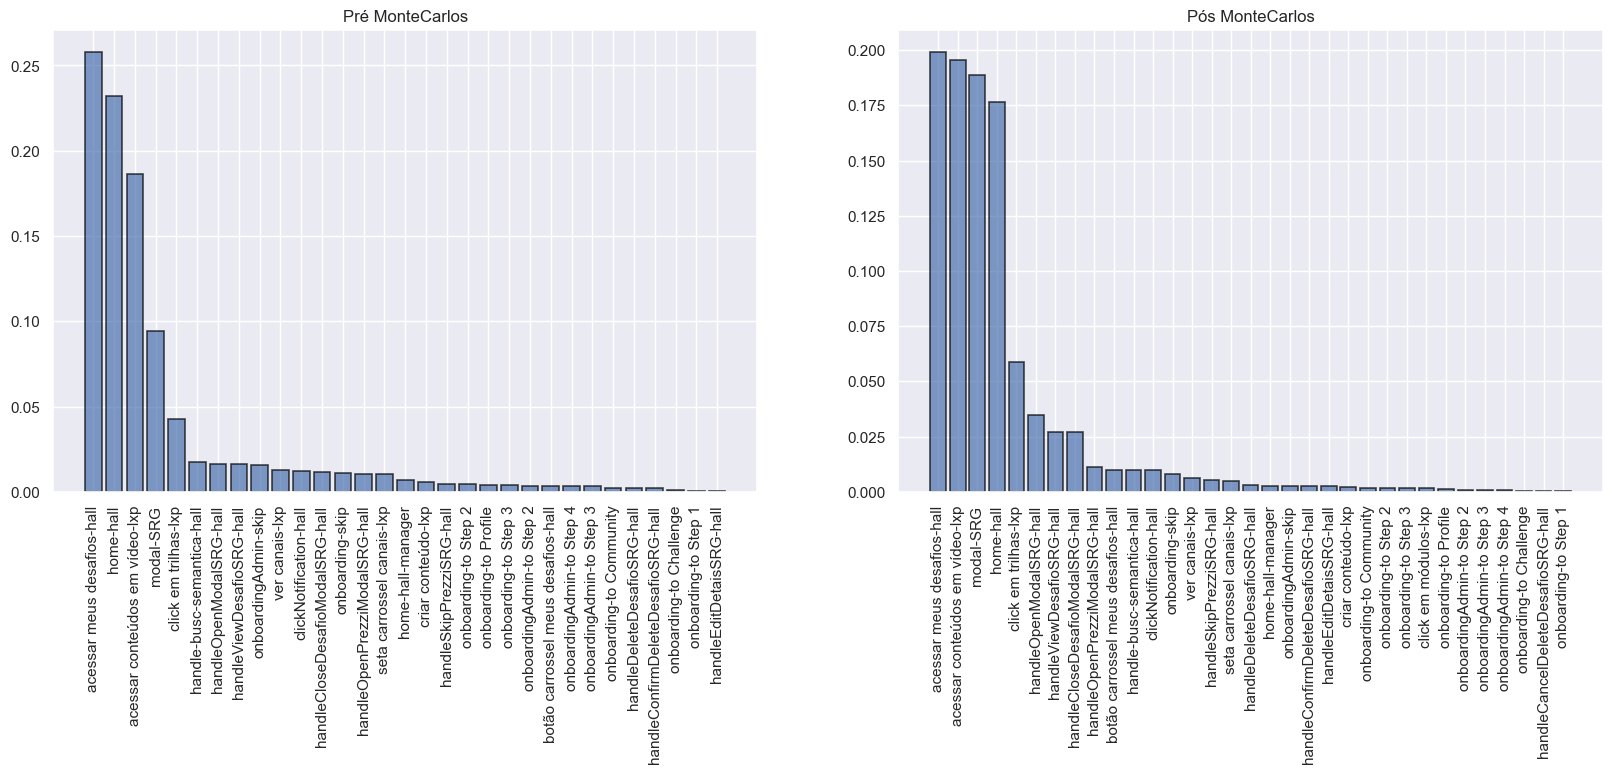

In [164]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.bar(df_paths['Actions'], df_paths['Count'], edgecolor='black', linewidth=1.2, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Pré MonteCarlos')

plt.subplot(1,2,2)
plt.bar(df_monte_carlo['chaves'], df_monte_carlo['contagem'], edgecolor='black', linewidth=1.2, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Pós MonteCarlos')

plt.show()

# PI

In [ ]:
x_list = [np.random.uniform(-1,1) for _ in range(100)]
y_list = [np.random.uniform(-1,1) for _ in range(100)]

In [ ]:
red = []
red_x = []
red_y = []
all_x = []
all_y = []
all_points = []
i = 0
while i < len(x_list):

    if (x_list[i])**2 + (y_list[i])**2 <= 1:
        red_x.append(x_list[i])
        red_y.append(y_list[i])
        red.append((x_list[i], y_list[i]))
        
    all_points.append((x_list[i], y_list[i]))
    all_x.append(x_list[i])
    all_y.append(y_list[i])

    i += 1



(-2.0, 2.0)

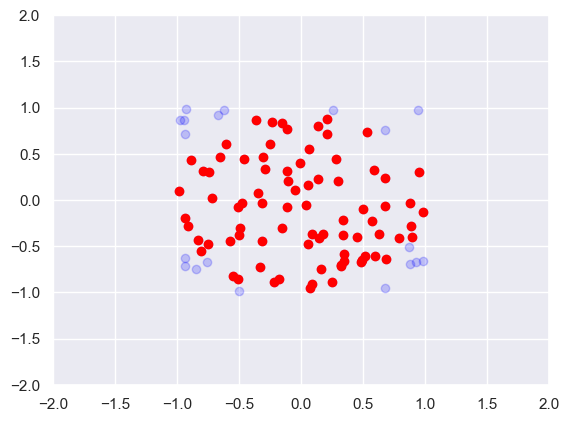

In [ ]:
plt.scatter(all_x, all_y, color='blue', alpha=0.2)
plt.scatter(red_x, red_y, color='red')

plt.xlim(-2,2)
plt.ylim(-2,2)

In [ ]:
nRed = len(red_x)
nAll = len(all_x)
pi = 4 * (nRed/nAll)

print(pi)

3.24
